In [75]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, adjusted_rand_score
from numpy import linalg as LA
from scipy.spatial.distance import pdist, cdist, squareform
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, cdist, squareform
from sklearn.decomposition import PCA
from functions import *


### the original dataset is just a subset of iris :)
data = load_iris()
X = data.data
y = data.target
X = X[np.where(y<2)]

X_transformed = impostor(X, 1.0/400)

In [76]:
X.shape, X_transformed.shape

((100, 4), (100, 99))

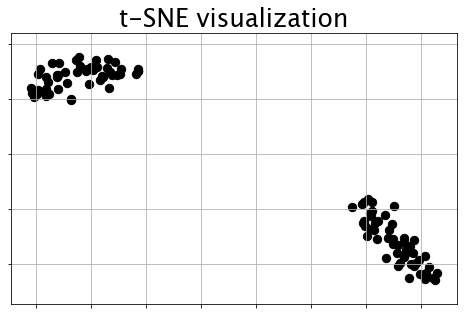

In [85]:
# Fit t-SNE
tsne = TSNE(n_components=2, perplexity=20, random_state=0)
X_tsne = tsne.fit_transform(X_transformed)
fig, ax = plt.subplots(figsize=(8,5))

ax.scatter(X_tsne[:,0], X_tsne[:,1], c='black', s=70)
ax.grid('on')
ax.axis('equal')

ax.set_title('t-SNE visualization', fontsize=25)
ax.set_xticklabels([])
ax.set_yticklabels([])

plt.savefig('visuals/demo/tSNE_INTRO.png',bbox_inches='tight')


In [78]:
kmeans = KMeans(n_clusters=2, random_state=42)
y_pred_orig = kmeans.fit_predict(X_transformed)


kmeans = KMeans(n_clusters=2, random_state=42)
y_pred_tsne = kmeans.fit_predict(X_tsne)

/Users/noahbergam/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/noahbergam/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [79]:
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from permetrics.clustering import ClusteringMetric


### SILHOUETTE SCORES
print('SILHOUETTE ON LOW-DIM tsne (w.r.t to k-means on low-dim)', silhouette_score(X_tsne, y_pred_tsne))
print('SILHOUETTE ON HIGH-DIM (w.r.t to k-means on low-dim)', silhouette_score(X_transformed, y_pred_tsne))
print('\n')
### CALINSKI-HARABASZ
print('CALINSKI ON LOW-DIM tsne (w.r.t to k-means on low-dim)', calinski_harabasz_score(X_tsne, y_pred_tsne))
print('CALINSKI ON HIGH-DIM (w.r.t to k-means on low-dim)', calinski_harabasz_score(X_transformed, y_pred_tsne))
print('\n')
### DAVIES-BOUDLIN
print('DAVIES-BOULDIN ON LOW-DIM tsne (w.r.t to k-means on low-dim)', davies_bouldin_score(X_tsne, y_pred_tsne))
print('DAVIES-BOULDIN ON HIGH-DIM (w.r.t to k-means on low-dim)', davies_bouldin_score(X_transformed, y_pred_tsne))
print('\n')
### DUNN
#print('DUNN ON LOW-DIM tsne (w.r.t to k-means on low-dim)', ClusteringMetric(X=X_tsne, y_pred=y_pred_tsne).dunn_index())
#print('DUNN ON HIGH-DIM (w.r.t to k-means on low-dim)', ClusteringMetric(X=X_transformed,  y_pred=y_pred_tsne).dunn_index())
### DUNN index by hand
dunn_og = np.min(squareform(pdist(X_transformed, metric='euclidean'))[50:, :50])/ np.max(squareform(pdist(X_transformed, metric='euclidean'))[:50,:50])
dunn_tsne = np.min(squareform(pdist(X_tsne, metric='euclidean'))[50:, :50])/ np.max(squareform(pdist(X_tsne, metric='euclidean'))[:50,:50])
### DUNN
print('DUNN ON LOW-DIM tsne (w.r.t to k-means on low-dim)', dunn_tsne)
print('DUNN ON HIGH-DIM (w.r.t to k-means on low-dim)', dunn_og)


SILHOUETTE ON LOW-DIM tsne (w.r.t to k-means on low-dim) 0.8849424
SILHOUETTE ON HIGH-DIM (w.r.t to k-means on low-dim) 0.006084161156767708


CALINSKI ON LOW-DIM tsne (w.r.t to k-means on low-dim) 2818.5969117911764
CALINSKI ON HIGH-DIM (w.r.t to k-means on low-dim) 1.6141396379883737


DAVIES-BOULDIN ON LOW-DIM tsne (w.r.t to k-means on low-dim) 0.16847104039281616
DAVIES-BOULDIN ON HIGH-DIM (w.r.t to k-means on low-dim) 7.791879447571953


DUNN ON LOW-DIM tsne (w.r.t to k-means on low-dim) 2.3145821600379306
DUNN ON HIGH-DIM (w.r.t to k-means on low-dim) 0.9980397296783491


In [80]:
import umap

X_pca = PCA(n_components=2).fit_transform(X_transformed)

X_umap = umap.UMAP(random_state=42).fit_transform(X)

/Users/noahbergam/opt/anaconda3/lib/python3.8/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Text(0.5, 0.98, 'PCA, t-SNE, and UMAP projections')

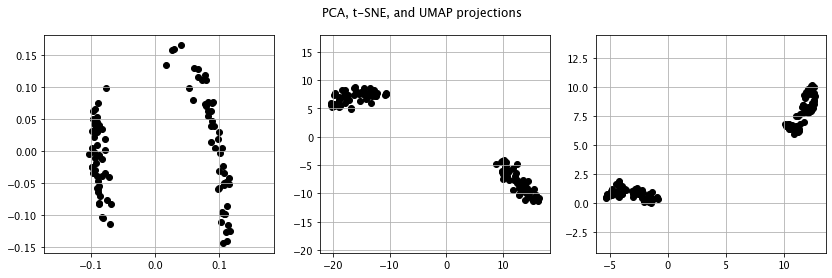

In [81]:
fig, axs = plt.subplots(1,3, figsize=(14,4))
plt.axis('equal')
axs[0].scatter(X_pca[:,0], X_pca[:,1], c='black')
axs[0].set_aspect('equal',adjustable='datalim')
axs[0].grid(True)

axs[1].scatter(X_tsne[:,0], X_tsne[:,1], c='black')
axs[1].set_aspect('equal',adjustable='datalim')
axs[1].grid(True)

axs[2].scatter(X_umap[:,0], X_umap[:,1], c='black')
axs[2].set_aspect('equal',adjustable='datalim')
axs[2].grid(True)


plt.axis('equal')
fig.suptitle('PCA, t-SNE, and UMAP projections')

Text(0.5, 0.98, 'PCA, t-SNE, and UMAP projections, colored by k-means labels in original space')

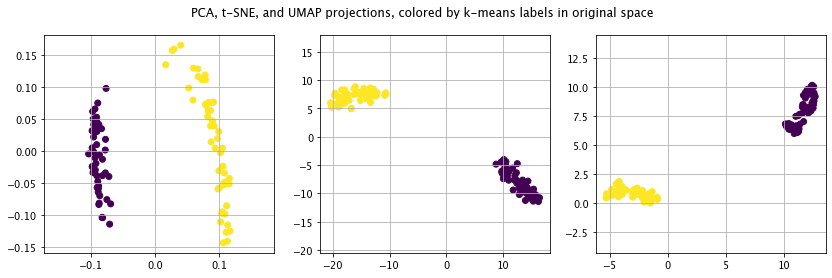

In [82]:
kmeans = KMeans(n_clusters=2, random_state=0, n_init=5)
y_pred_orig = kmeans.fit_predict(X_transformed)

fig, axs = plt.subplots(1,3, figsize=(14,4))
axs[0].scatter(X_pca[:,0], X_pca[:,1], c=y_pred_orig)
axs[0].grid('on')
axs[0].set_aspect('equal', adjustable='datalim')

axs[1].scatter(X_tsne[:,0], X_tsne[:,1], c=y_pred_orig)
axs[1].grid('on')
axs[1].set_aspect('equal', adjustable='datalim')

axs[2].scatter(X_umap[:,0], X_umap[:,1], c=y_pred_orig)
axs[2].grid('on')
axs[2].set_aspect('equal',adjustable='datalim')


plt.axis('equal')
fig.suptitle('PCA, t-SNE, and UMAP projections, colored by k-means labels in original space')

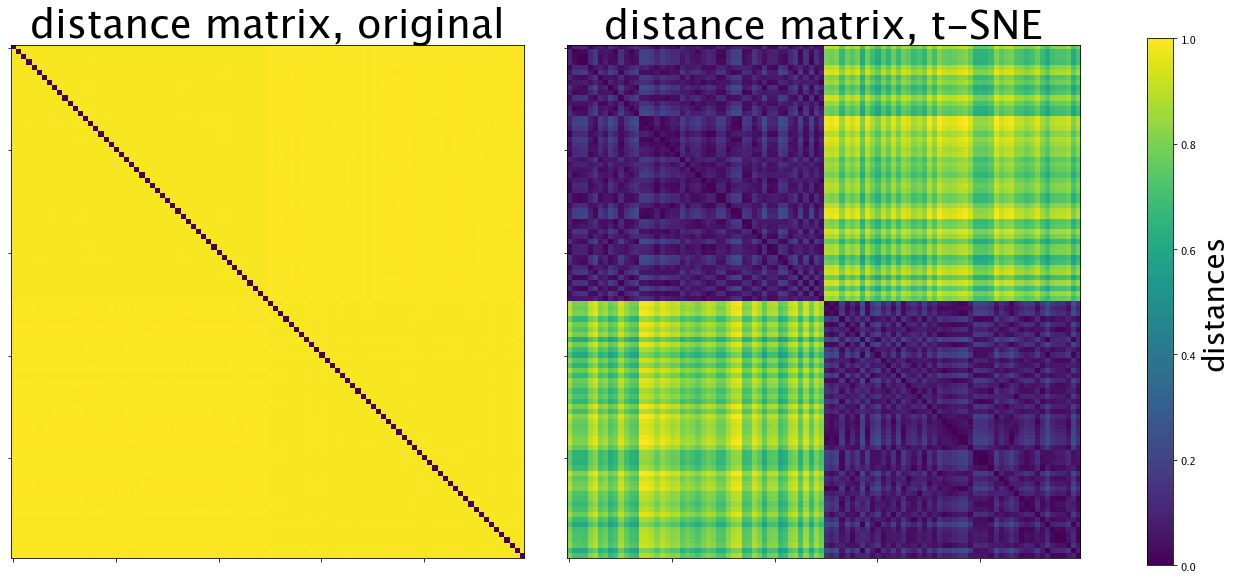

In [83]:
MAT0 = squareform(pdist(X_transformed))
MAT1 = squareform(pdist(X_tsne))
MAT0 /= np.max(MAT0)
MAT1 /= np.max(MAT1)

from scipy.cluster.hierarchy import dendrogram, linkage

fig, axs = plt.subplots(1, 2, figsize=(20, 10))


img0 = axs[0].imshow(  MAT0  )
axs[0].set_title("distance matrix, original", fontsize=40)
axs[0].set_xticklabels([]) 
axs[0].set_yticklabels([]) 

img = axs[1].imshow(  MAT1  )
axs[1].set_title("distance matrix, t-SNE", fontsize=40)
axs[1].set_xticklabels([]) 
axs[1].set_yticklabels([]) 

plt.subplots_adjust(wspace=0.4, hspace=0.5)
plt.tight_layout(pad=5.0)
cbar = fig.colorbar(img0, ax=[axs[0], axs[1]], orientation='vertical',shrink=0.85)
cbar.set_label("distances", fontsize=30)

plt.savefig('visuals/demo/DEMO_pca_tsne_umap_distances', bbox_inches='tight')

[Text(5, 0, ''),
 Text(15, 0, ''),
 Text(25, 0, ''),
 Text(35, 0, ''),
 Text(45, 0, ''),
 Text(55, 0, ''),
 Text(65, 0, ''),
 Text(75, 0, ''),
 Text(85, 0, ''),
 Text(95, 0, ''),
 Text(105, 0, ''),
 Text(115, 0, ''),
 Text(125, 0, ''),
 Text(135, 0, ''),
 Text(145, 0, ''),
 Text(155, 0, ''),
 Text(165, 0, ''),
 Text(175, 0, ''),
 Text(185, 0, ''),
 Text(195, 0, ''),
 Text(205, 0, ''),
 Text(215, 0, ''),
 Text(225, 0, ''),
 Text(235, 0, ''),
 Text(245, 0, ''),
 Text(255, 0, ''),
 Text(265, 0, ''),
 Text(275, 0, ''),
 Text(285, 0, ''),
 Text(295, 0, ''),
 Text(305, 0, ''),
 Text(315, 0, ''),
 Text(325, 0, ''),
 Text(335, 0, ''),
 Text(345, 0, ''),
 Text(355, 0, ''),
 Text(365, 0, ''),
 Text(375, 0, ''),
 Text(385, 0, ''),
 Text(395, 0, ''),
 Text(405, 0, ''),
 Text(415, 0, ''),
 Text(425, 0, ''),
 Text(435, 0, ''),
 Text(445, 0, ''),
 Text(455, 0, ''),
 Text(465, 0, ''),
 Text(475, 0, ''),
 Text(485, 0, ''),
 Text(495, 0, ''),
 Text(505, 0, ''),
 Text(515, 0, ''),
 Text(525, 0, ''),
 Tex

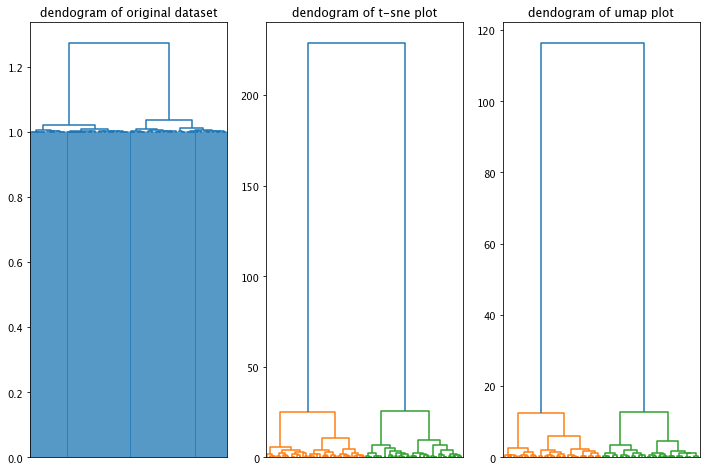

In [84]:
fig, axs = plt.subplots(1, 3, figsize=(12, 8))

Z = linkage(X_transformed, method='ward')
_ = dendrogram(Z, ax=axs[0])
axs[0].set_title("dendogram of original dataset")
axs[0].set_xticklabels([]) 

Z_tsne = linkage(X_tsne, method='ward')
_ = dendrogram(Z_tsne, ax=axs[1])
axs[1].set_title("dendogram of t-sne plot")
axs[1].set_xticklabels([]) 

Z_umap = linkage(X_umap, method='ward')
_ = dendrogram(Z_umap, ax=axs[2])
axs[2].set_title("dendogram of umap plot")
axs[2].set_xticklabels([]) 


#plt.savefig('visuals/demo/dendograms')